## LDA(Linear Discriminant Analysis)

- LDA(Linear Discriminant Analysis)는 선형 판별 분석법으로 불리며, PCA와 매우 유사합니다.
- LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소합니다. PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾습니다.
- LDA는 같은 클래스의 데이터는 최대한 근접해서, 다른 클래스의 데이터는 최대한 떨어뜨리는 축 매핑을 합니다.

<img src="./img/1.png"  width="700" height="370">

### LDA(Linear Discriminant Analysis) 차원 축소 방식
LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소합니다. 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식입니다.  

<img src="./img/2.png"  width="700" height="370">

### LDA 절차
일반적으로 LDA를 구하는 스텝은 PCA와 유사하나 가장 큰 차이점은 공분산 행렬이 아니라 앞에서 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점입니다.

1. 클래스 내부와 클래스 간 분산 행렬을 구합니다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균벡터(mean vector)를 기반으로 구합니다.
2. 클래스 내부 분산 행렬을 Sw, 클라스 간 분산 행렬을 SB라고 하면 다음 식으로 두 행렬을 고유 벡터로 분해할 수 있습니다.
<img src="./img/3.png"  width="400" height="370">
3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출합니다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환합니다.


### 붓꽃 데이터 셋에 LDA 적용하기 

붓꽃 데이터 세트를 사이킷런의 LDA를 이용해 변환하고, 그 결과를 품조열로 시각화해 보겠습니다.  
사이킷런은 LDA를 LinearDiscriminantAnalysis 클래스로 제공합니다. 붓꽃 데이터 세트를 로드하고 표준 정규 분포로 스케일링합니다.


In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

2개의 컴포넌트로 붓꽃 데이터를 LDA 변환하겠습니다. PCA와 다르게 LDA에서 한 가지 유의해야할 점은 LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습이라는 것입니다. 즉, 클래스의 결정값이 변환 시에 필요합니다. 다음 lda 객체의 fit() 메서드를 호출할 때 결정값이 입력 됐음에 유의하세요

In [3]:
lda = LinearDiscriminantAnalysis(n_components=2)

# fit()호출 시 target값 입력 
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


이제 LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현해 보겠습니다.

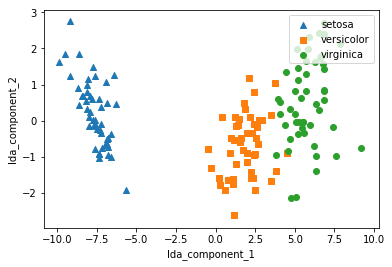

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

**참고) PCA 코드**

(150, 2)


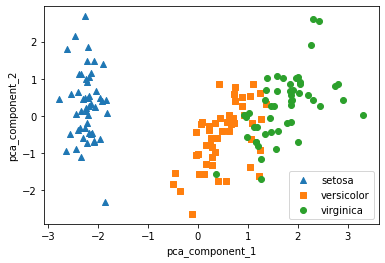

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()